### Name : P. Revanth Krishna Varma
### Sec  : CSE-C
### Regno: BL.EN.U4CSE21155

In [66]:
import pandas as pd
import numpy as np
data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}
df = pd.DataFrame(data)
df


,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [67]:
import math
def calculate_entropy(data):
    total_samples = len(data)
    if total_samples == 0:
        return 0
    positive_samples = sum(data['buys_computer'] == 'yes')
    negative_samples = sum(data['buys_computer'] == 'no')
    p_positive = positive_samples / total_samples
    p_negative = negative_samples / total_samples
    if p_positive == 0 or p_negative == 0:
        return 0
    entropy = -p_positive * math.log2(p_positive) - p_negative * math.log2(p_negative)
    return entropy


In [68]:
entropy_root = calculate_entropy(df)
print(entropy_root)

0.9402859586706311


In [69]:
def calculate_information_gain(data, attribute, root_entropy):
    unique_values = data[attribute].unique()
    weighted_entropy_after_split = 0
    for value in unique_values:
        subset = data[data[attribute] == value]
        subset_entropy = calculate_entropy(subset)
        weight = len(subset) / len(data)
        weighted_entropy_after_split += weight * subset_entropy
    information_gain = root_entropy - weighted_entropy_after_split
    return information_gain


In [87]:
information_gains = {}
for attribute in df.columns[:-1]:
    information_gain = calculate_information_gain(df, attribute, root_entropy)
    information_gains[attribute] = information_gain
root_node = max(information_gains, key=information_gains.get)
print("Information Gains:")
 for attribute, gain in information_gains.items():
    print(f"{attribute}: {gain}")
    print(f"\nRoot Node (Highest Information Gain): {root_node}")

IndentationError: unexpected indent (2687770540.py, line 7)

In [74]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['age', 'income', 'student', 'credit_rating', 'buys_computer']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
print(df)

    age  income  student  credit_rating  buys_computer
0     1       0        0              1              0
1     1       0        0              0              0
2     0       0        0              1              1
3     2       2        0              1              1
4     2       1        1              1              1
5     2       1        1              0              0
6     0       1        1              0              1
7     1       2        0              1              0
8     1       1        1              1              1
9     2       2        1              1              1
10    1       2        1              0              1
11    0       2        0              0              1
12    0       0        1              1              1
13    2       2        0              0              0


In [75]:
x=df.drop("buys_computer",axis=1)
y=df["buys_computer"]

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [77]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

# score on train data
model.score(x_train,y_train)

1.0

### Q. A2:

In [78]:
depth_of_tree=model.get_depth()
print(depth_of_tree)

4


In [79]:
y_preds=model.predict(x_test.values)
y_preds

/Users/revanthvarma/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1, 0, 1, 1])

In [50]:
from sklearn.metrics import confusion_matrix,classification_report
decession_matrix=confusion_matrix(y_test,y_preds)
decession_report = classification_report(y_test,y_preds)

In [51]:
print(decession_matrix)

[[1 1]
 [0 2]]


In [52]:
print(decession_report)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [80]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def evaluate_preds(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = { "accuracy": round(accuracy,2),
                   "precision" : round(precision,2),
                  "recall": round(recall,2),
                  "f1":round(f1,2)}
    print(f"Acc       : {accuracy*100:.2f}%")
    print(f"Precision : {precision*100:.2f}%")
    print(f"Recall    : {recall*100:.2f}%")
    print(f"F1_score  : {f1*100:.2f}%")
    return metric_dict

In [81]:
metrics = evaluate_preds(y_test,y_preds)
metrics

Acc       : 75.00%
Precision : 66.67%
Recall    : 100.00%
F1_score  : 80.00%


{'accuracy': 0.75, 'precision': 0.67, 'recall': 1.0, 'f1': 0.8}

### Q. A3:

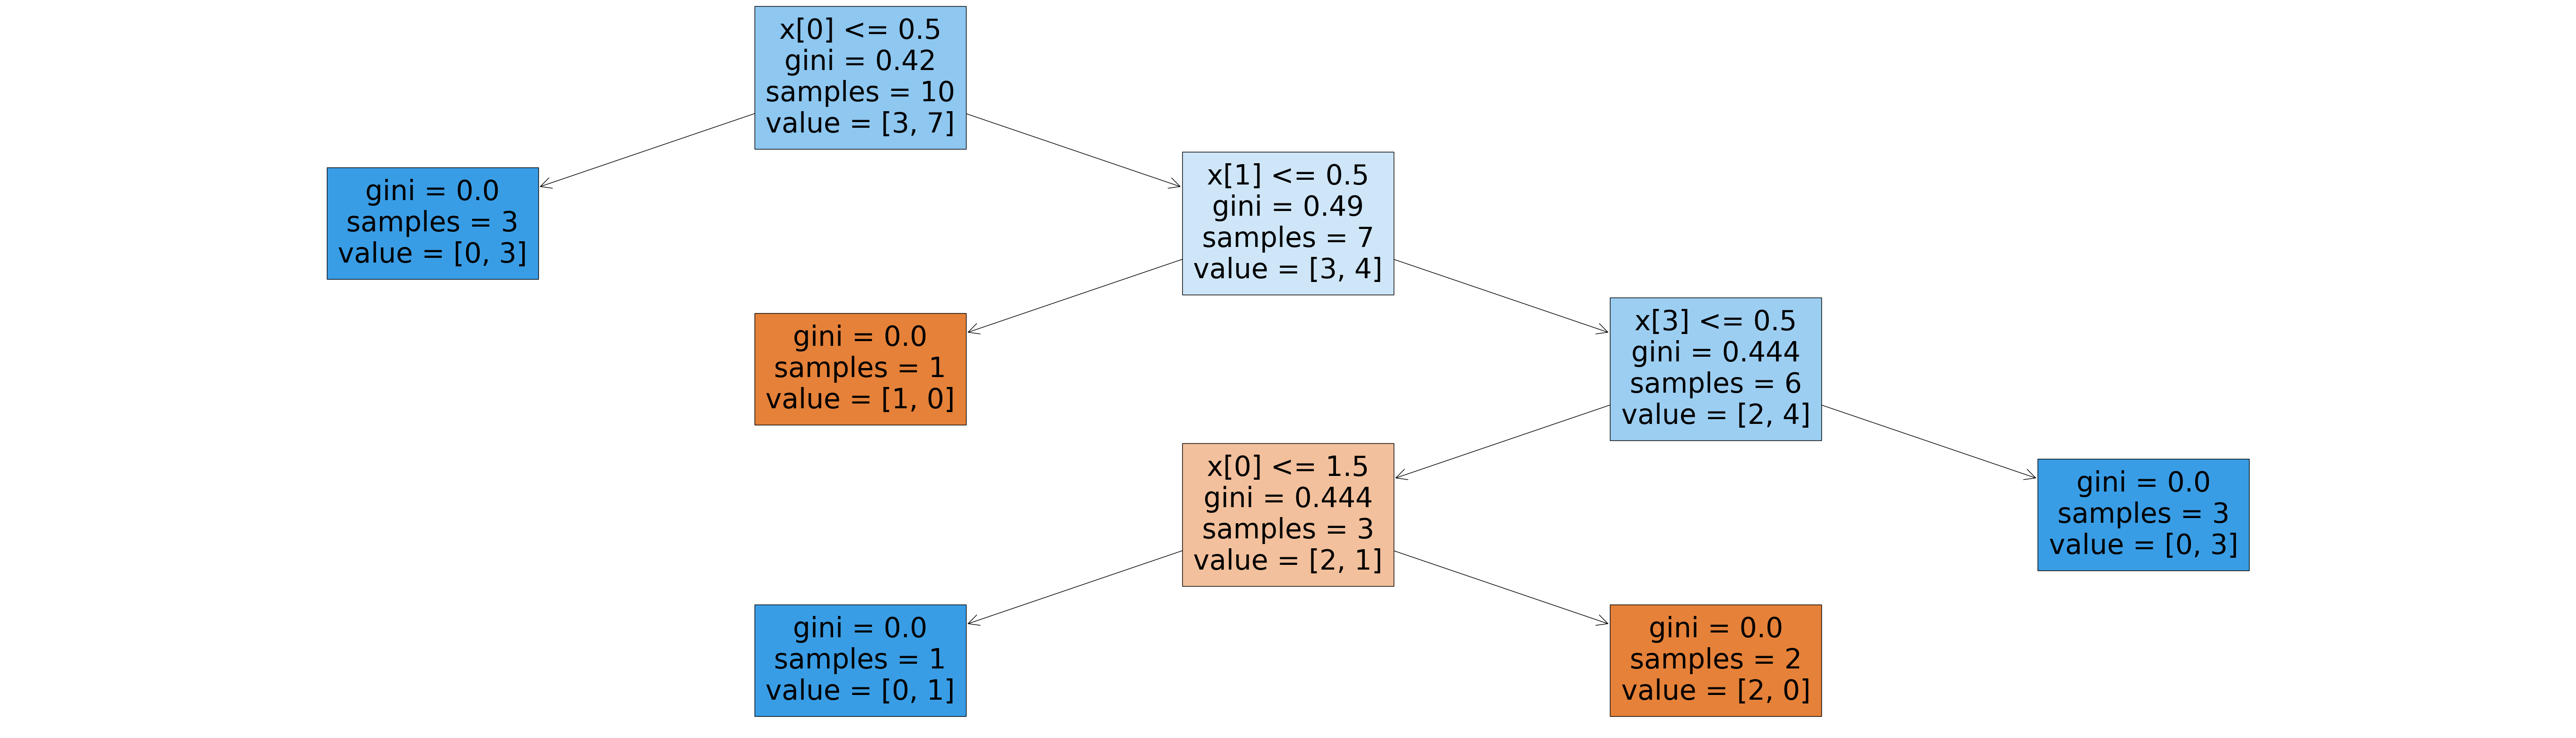

In [55]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(70, 20))
from sklearn.tree import plot_tree 
plot_tree(model, filled=True)
plt.show()

### Question A5

In [21]:
model_improved = DecisionTreeClassifier(max_depth=5)
model_improved.fit(x_train,y_train)
# score on train data
print(f"The score on training data :{ model_improved.score(x_train,y_train)}")

# score on test data
print(f"The score on training data :{ model_improved.score(x_test,y_test)}")

The score on training data :0.26004056795131847
The score on training data :0.22992700729927007


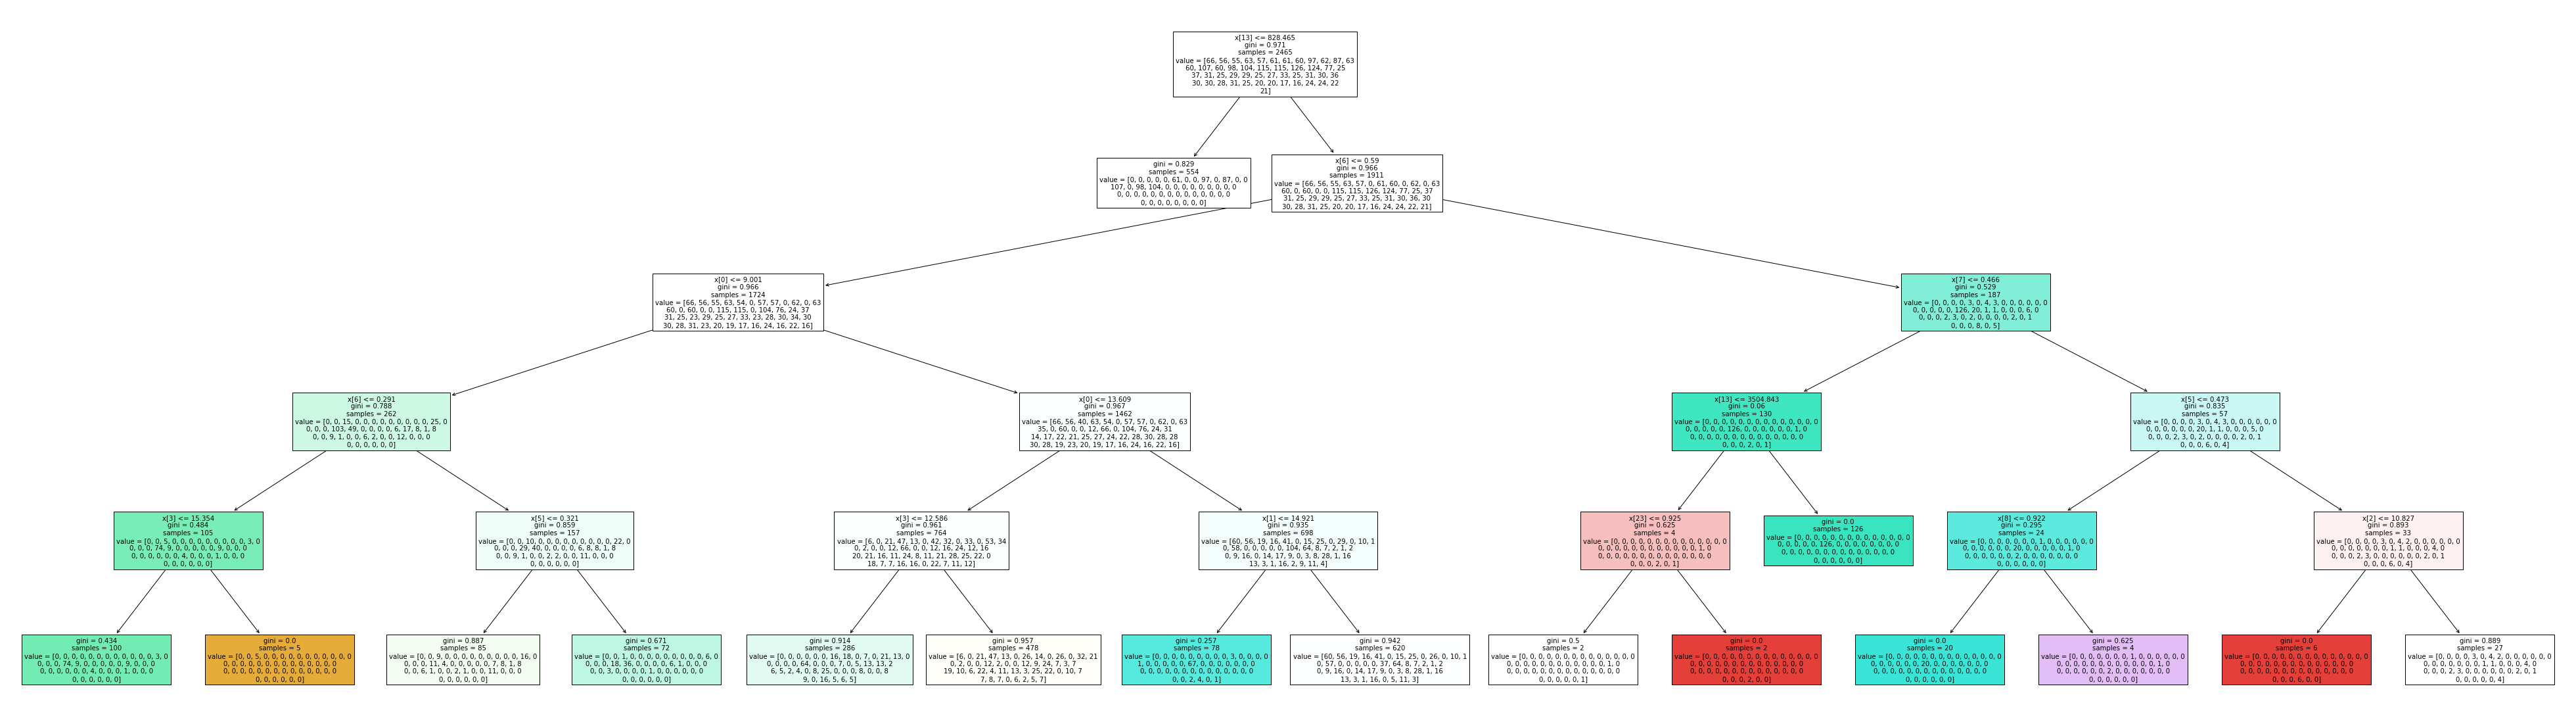

In [22]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(70, 20))
from sklearn.tree import plot_tree 
plot_tree(model_improved, filled=True)
plt.show()